### Sports Image Classification

In [54]:
# tensor imports
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# import metrics
from sklearn.metrics import confusion_matrix
import warnings

In [55]:
# Using the ImageDataGenerator rescale the image to standard size for all the images in train and validation directories. 
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)


In [56]:
# These generators are used to provide batches of images to the CNN model during training (train_generator) and validation (valid_generator).
train_generator = train_datagen.flow_from_directory('train', target_size=(224, 224), class_mode='categorical')
valid_generator = valid_datagen.flow_from_directory('valid', target_size=(224, 224), class_mode='categorical')


Found 13492 images belonging to 100 classes.
Found 500 images belonging to 100 classes.


In [57]:
# Read the CSV file which has the label for each sports class. 
train_labels_df = pd.read_csv('sports.csv')
train_labels_df.head()

,class id,filepaths,labels,data set
0,0,train/air hockey/001.jpg,air hockey,train
1,0,train/air hockey/002.jpg,air hockey,train
2,0,train/air hockey/003.jpg,air hockey,train
3,0,train/air hockey/004.jpg,air hockey,train
4,0,train/air hockey/005.jpg,air hockey,train


In [58]:
# Get one batch of data
images, ohe_labels = next(train_generator)

# Check the shape of images and labels
print("Image batch shape:", images.shape)  # E.g., (batch_size, 224, 224, 3)
print("Label batch shape:", ohe_labels.shape)  # E.g., (batch_size, num_classes)


Image batch shape: (32, 224, 224, 3)
Label batch shape: (32, 100)


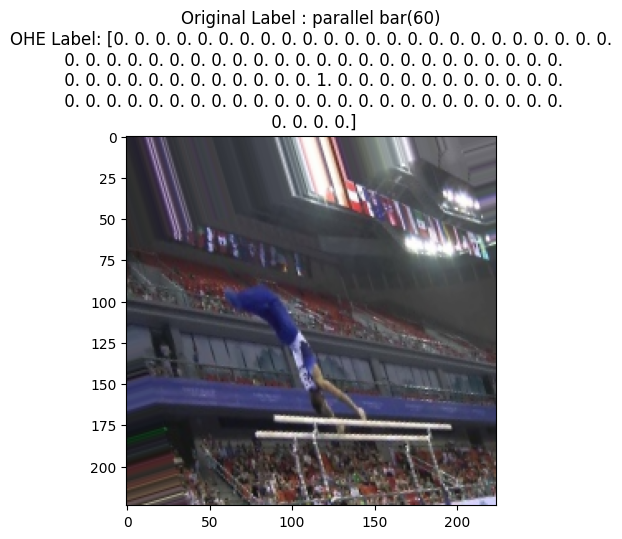

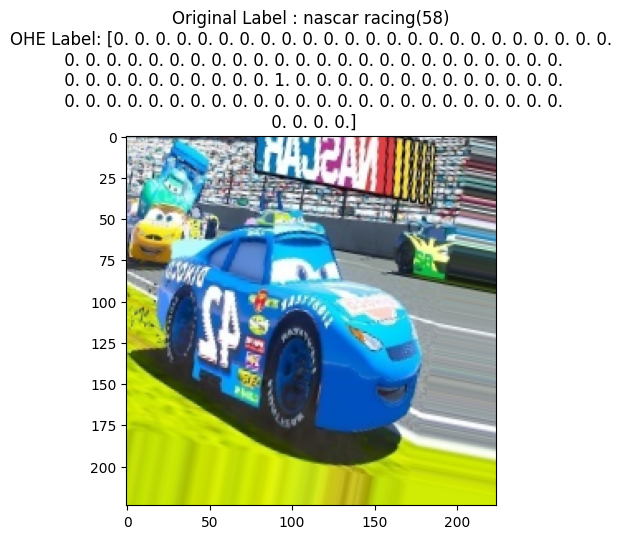

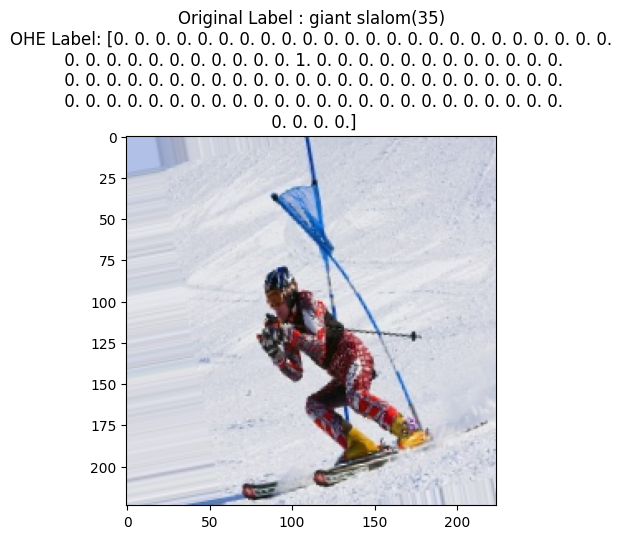

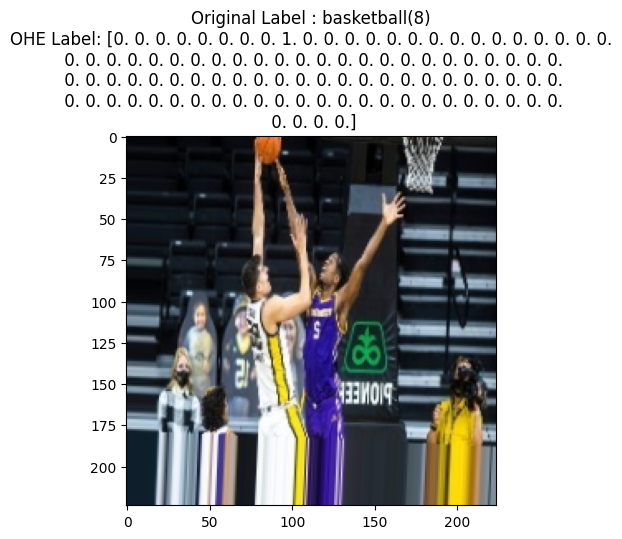

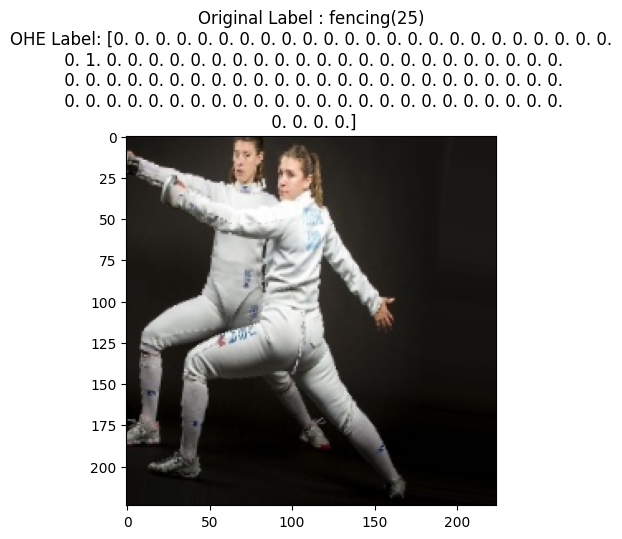

In [59]:
# Convert one-hot encoded labels to original class numbers using np.argmax
original_labels = np.argmax(ohe_labels, axis=1)
#print(train_labels_df['labels'][train_labels_df['class id'] == 0].iloc[0])

# Visualize the first 5 images
for i in range(5):
    display_label_name = train_labels_df['labels'][train_labels_df['class id'] == original_labels[i]].iloc[0]
    plt.imshow(images[i])
    plt.title(f'Original Label : {display_label_name}({original_labels[i]})\nOHE Label: {ohe_labels[i]}')
    plt.show()

#### Build the model

In [60]:
warnings.filterwarnings('ignore')

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(filters=54, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.15),
    Dense(100, activation='softmax')  
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [61]:
# fit the model
warnings.filterwarnings('ignore')
history = model.fit(train_generator, epochs=20, validation_data=valid_generator)


Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 285s 669ms/step - accuracy: 0.0266 - loss: 4.6353 - val_accuracy: 0.0920 - val_loss: 3.8859
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 286s 674ms/step - accuracy: 0.1046 - loss: 3.8115 - val_accuracy: 0.1980 - val_loss: 3.3706
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 290s 684ms/step - accuracy: 0.1726 - loss: 3.3716 - val_accuracy: 0.2540 - val_loss: 3.0255
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 288s 679ms/step - accuracy: 0.2339 - loss: 3.0636 - val_accuracy: 0.3320 - val_loss: 2.6983
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 294s 693ms/step - accuracy: 0.2723 - loss: 2.8697 - val_accuracy: 0.3760 - val_loss: 2.4776
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 332s 784ms/step - accuracy: 0.3025 - loss: 2.6991 - val_accuracy: 0.3500 - val_loss: 2.5615
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 352s 831ms/step - accuracy: 0.3297 - loss: 2.5851 - val_accuracy: 0.4220 - val_loss: 2.3558
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 330s 780ms/step - accuracy: 0.3511 -

#### Augment Test Data and Model Evaluate

In [62]:
warnings.filterwarnings('ignore')
test_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
test_generator = test_datagen.flow_from_directory('test', target_size=(224, 224), class_mode='categorical')

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}\nTest Loss: {test_loss}')


Found 500 images belonging to 100 classes.
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 203ms/step - accuracy: 0.5791 - loss: 1.6283
Test Accuracy: 0.5640000104904175
Test Loss: 1.6709787845611572


#### Save the model

In [63]:
warnings.filterwarnings('ignore')
#model.save('sports_classifier_model.h5')

#### Visualize Performance


In [64]:
history_df = pd.DataFrame(history.history)
history_df

,accuracy,loss,val_accuracy,val_loss
0,0.045434,4.345660,0.092,3.885906
1,0.120294,3.701729,0.198,3.370559
2,0.189964,3.291552,0.254,3.025513
3,0.244293,3.006486,0.332,2.698327
4,0.281278,2.835330,0.376,2.477631
5,0.309591,2.692578,0.350,2.561451
6,0.336718,2.571684,0.422,2.355780
7,0.352357,2.468504,0.432,2.193828
8,0.373258,2.397249,0.400,2.313411
9,0.384598,2.323922,0.454,2.144873


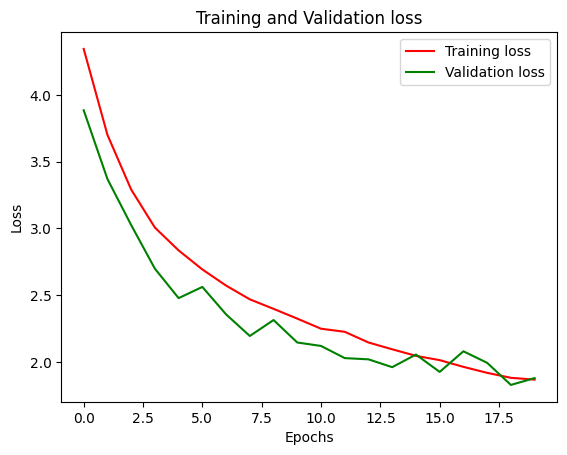

In [65]:
# Plotting training and validation loss over epochs
plt.plot(history_df.loc[:, ['loss']], "red", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"green", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")
plt.show()

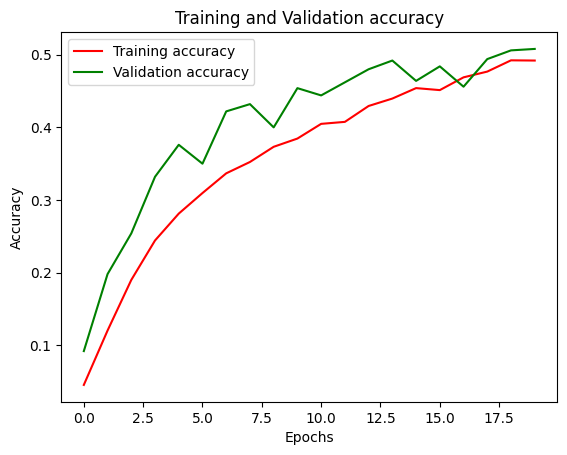

In [66]:
# Plotting training and validation accuracy over epochs
plt.plot(history_df.loc[:, ['accuracy']], "red", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "green", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()